<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/Startup_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Startup Dataset
#Source: https://www.kaggle.com/datasets/farhanmd29/50-startups
#Objective: Examine the relationship between investment and startup profit.

#Step 1: Setup and Data Preparation
#1. Load the Dataset

import pandas as pd

# Load the dataset
data = pd.read_csv("50_Startups.csv")

# Display first 5 rows
print(data.head())

# Display last 5 rows
print(data.tail())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
    R&D Spend  Administration  Marketing Spend       State    Profit
45    1000.23       124153.04          1903.93    New York  64926.08
46    1315.46       115816.21        297114.46     Florida  49490.75
47       0.00       135426.92             0.00  California  42559.73
48     542.05        51743.15             0.00    New York  35673.41
49       0.00       116983.80         45173.06  California  14681.40


In [2]:
#2. Understand the Structure
# Check structure
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000

In [3]:
#3. Handle Missing Values
#If there are missing values:

# Fill missing values with mean (for numerical) or mode (for categorical)
data['R&D Spend'] = data['R&D Spend'].fillna(data['R&D Spend'].mean())
data['Administration'] = data['Administration'].fillna(data['Administration'].mean())
data['Marketing Spend'] = data['Marketing Spend'].fillna(data['Marketing Spend'].mean())
data['State'] = data['State'].fillna(data['State'].mode()[0])

In [4]:
#4. Encode Categorical Variables
# One-hot encode the 'State' column
data = pd.get_dummies(data, columns=['State'], drop_first=True)

# Display updated dataset
print(data.head())

   R&D Spend  Administration  Marketing Spend     Profit  State_Florida  \
0  165349.20       136897.80        471784.10  192261.83          False   
1  162597.70       151377.59        443898.53  191792.06          False   
2  153441.51       101145.55        407934.54  191050.39           True   
3  144372.41       118671.85        383199.62  182901.99          False   
4  142107.34        91391.77        366168.42  166187.94           True   

   State_New York  
0            True  
1           False  
2           False  
3            True  
4           False  


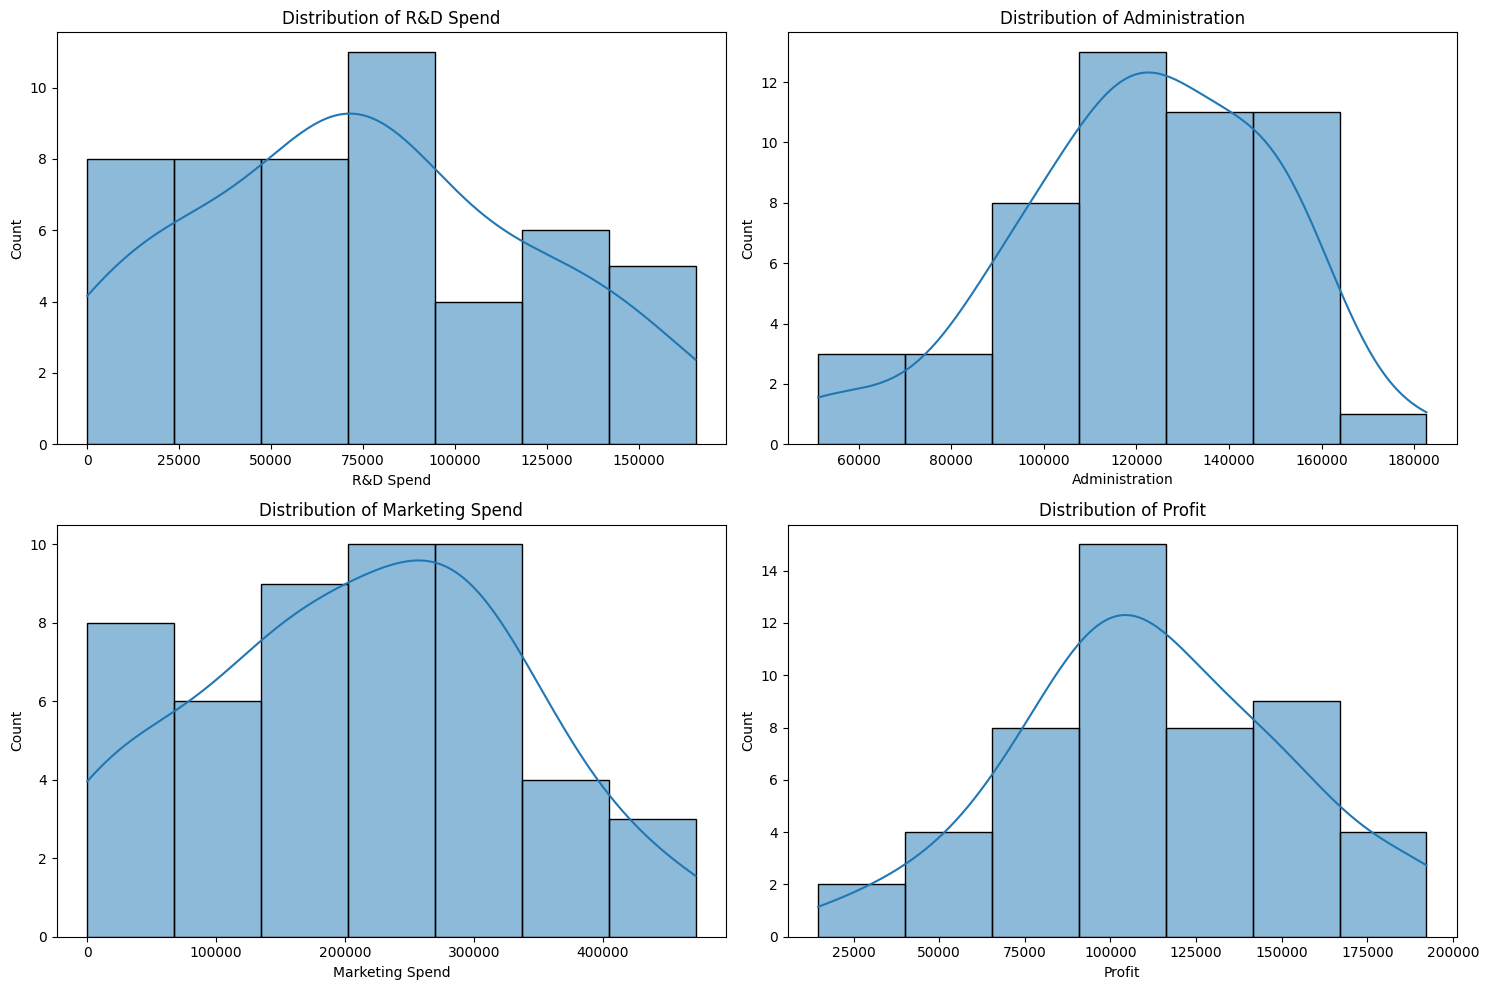

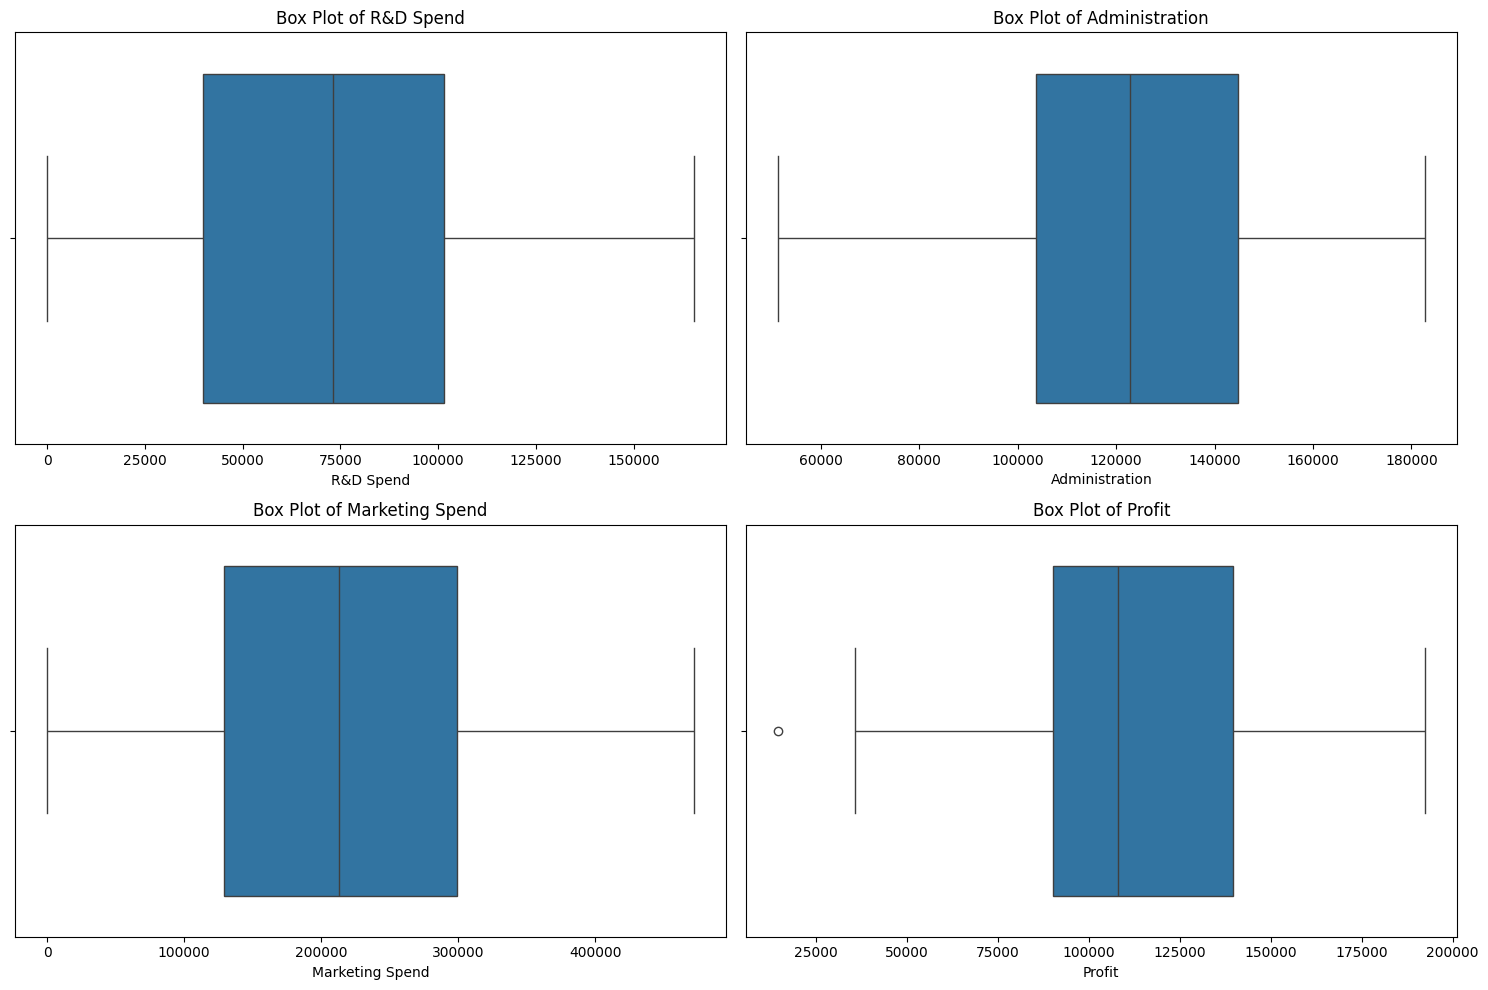

In [5]:
#Step 2: Exploratory Data Analysis
#1. Univariate Analysis
#Analyze the distribution of individual variables.

#Numerical Columns :

import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

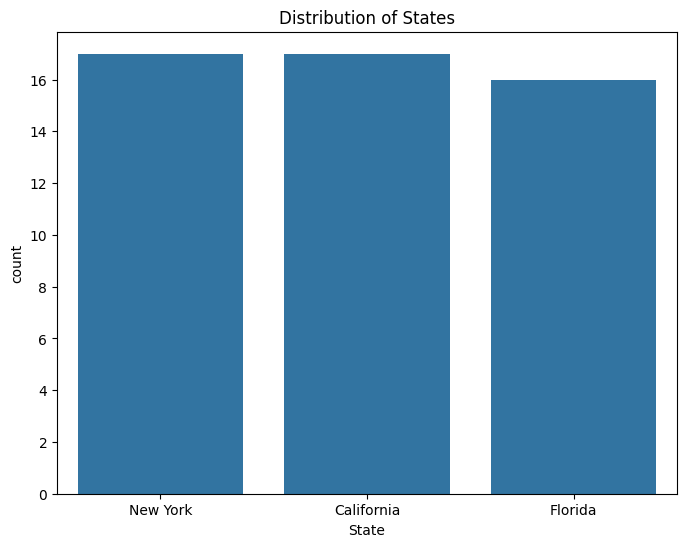

In [8]:
#Categorical Column (State) :
# Bar plot for state distribution
# Load the original dataset (before encoding)
original_data = pd.read_csv("50_Startups.csv")

# Bar plot for state distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='State', data=original_data)
plt.title('Distribution of States')
plt.show()

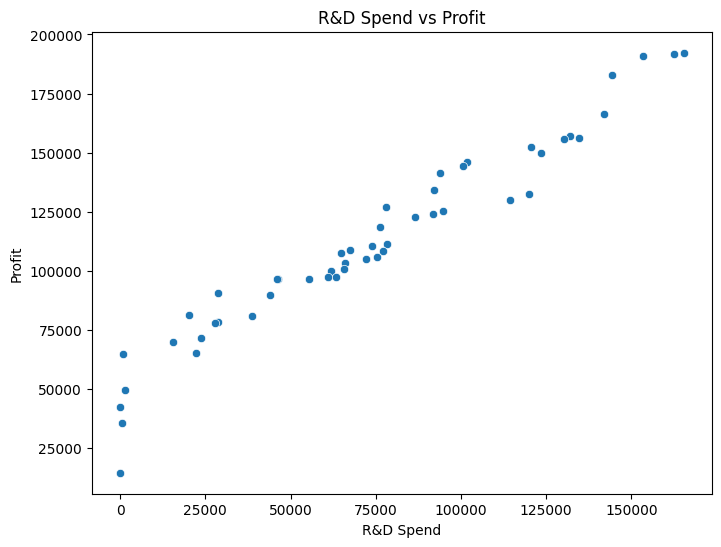

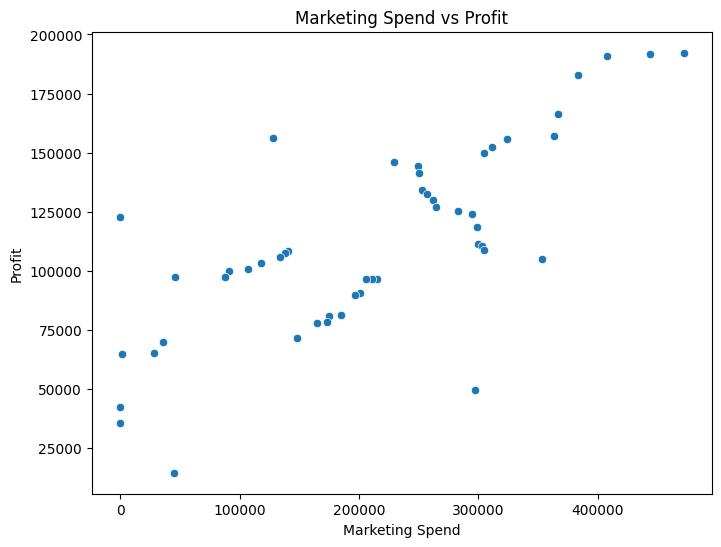

In [9]:
#2. Bivariate Analysis
#Analyze relationships between two variables.

#Scatter Plots :

# Scatter plots: R&D Spend vs Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='R&D Spend', y='Profit', data=data)
plt.title('R&D Spend vs Profit')
plt.show()

# Scatter plots: Marketing Spend vs Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Marketing Spend', y='Profit', data=data)
plt.title('Marketing Spend vs Profit')
plt.show()

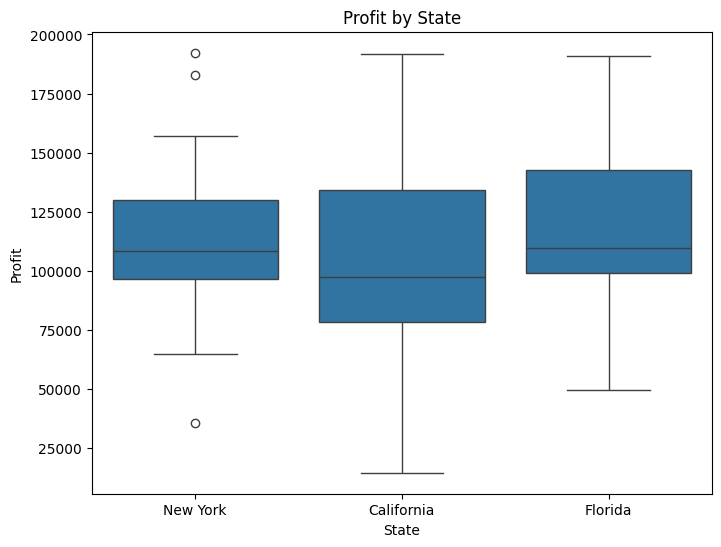

In [11]:
#Box Plots :
# Box plot: State vs Profit
# Load the original dataset (before encoding)
original_data = pd.read_csv("50_Startups.csv")

# Box plot: State vs Profit
plt.figure(figsize=(8, 6))
sns.boxplot(x='State', y='Profit', data=original_data)
plt.title('Profit by State')
plt.show()

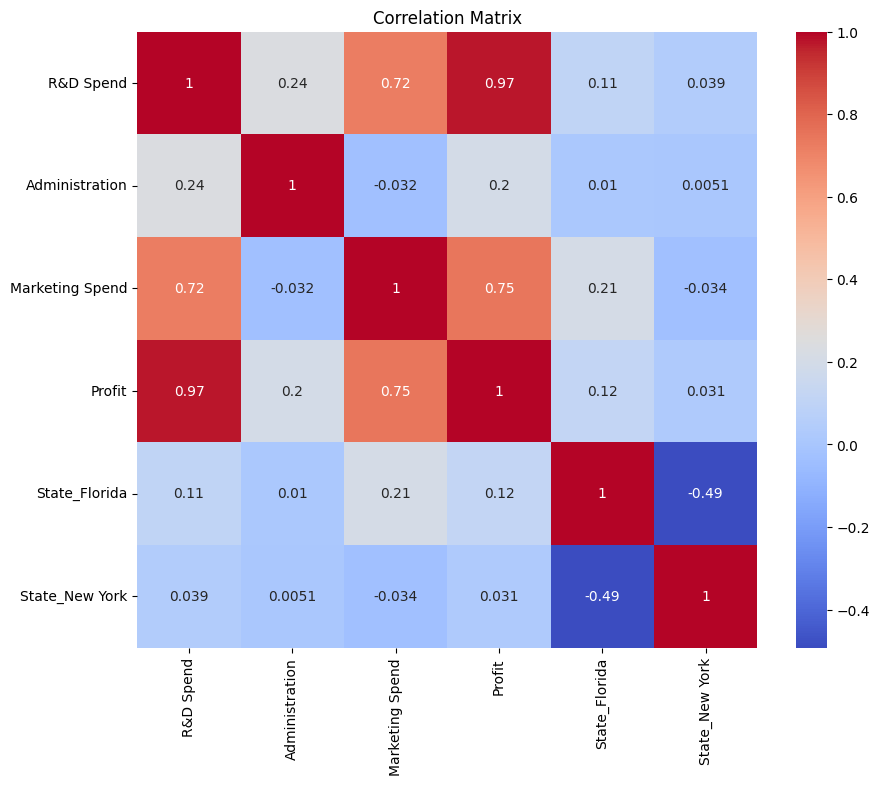

In [12]:
#3. Multivariate Analysis
#Analyze relationships between multiple variables.

#Correlation Matrix :

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

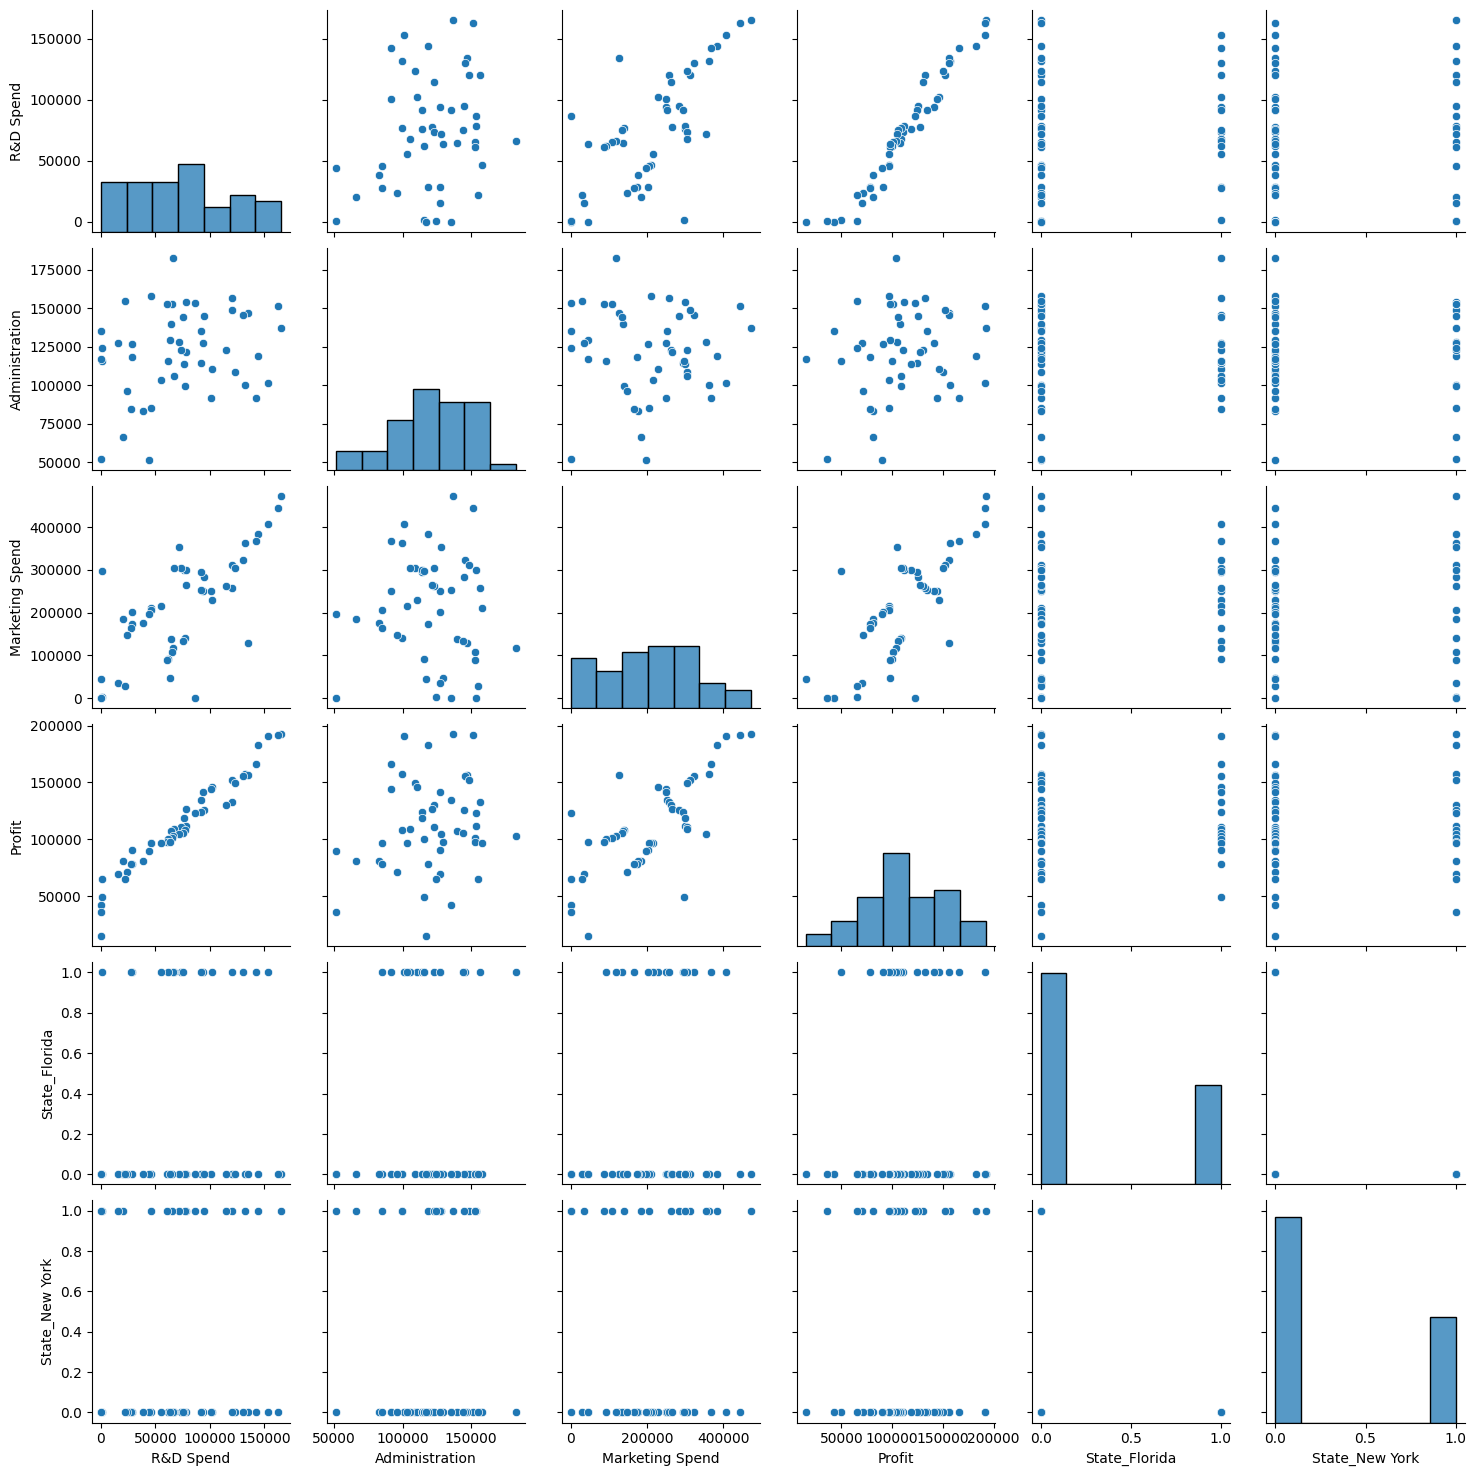

In [13]:
#Pair Plot :
# Pair plot
sns.pairplot(data)
plt.show()

In [14]:
#Step 3: Preprocessing and Feature Engineering
#1. Scale Numerical Features
#Normalize numerical features to ensure consistency.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['R&D Spend', 'Administration', 'Marketing Spend']] = scaler.fit_transform(data[['R&D Spend', 'Administration', 'Marketing Spend']])

In [15]:
"""
Step 4: Summary of Insights
Key Findings
Strong Correlation :
R&D Spend has the strongest positive correlation with Profit.
Marketing Spend also shows a moderate positive correlation with Profit.
State Impact :
Startups in certain states (e.g., California) tend to have higher profits.
Outliers :
Some startups have unusually high or low profits, which may need further investigation.
Recommendations
Focus on R&D Spend as a key predictor for profit.
Normalize features before training predictive models.
Investigate outliers to understand their impact.
"""

'\nStep 4: Summary of Insights\nKey Findings\nStrong Correlation :\nR&D Spend has the strongest positive correlation with Profit.\nMarketing Spend also shows a moderate positive correlation with Profit.\nState Impact :\nStartups in certain states (e.g., California) tend to have higher profits.\nOutliers :\nSome startups have unusually high or low profits, which may need further investigation.\nRecommendations\nFocus on R&D Spend as a key predictor for profit.\nNormalize features before training predictive models.\nInvestigate outliers to understand their impact. \n'